In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
res = 50
ptf_str = "1.0e+10"
ptf = 1e10
visc_cont = 1e6

qdeg_list = [2, 3, 4, 5]

fwhm_list = [0.001, 0.003, 0.005, 0.007, 0.009, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1]

title = fr"$\eta$ contrast: {visc_cont:.1e}; penalty mag.: {ptf:.1e}; resolution = {res}"

outdir = "/Users/jgra0019/Documents/codes/uw3-dev/penalty-method-testing/out/"

/Users/jgra0019/Documents/codes/uw3-dev/penalty-method-testing/out//qdeg2_res50_ptf1.0e+10.pkl
(11,)
/Users/jgra0019/Documents/codes/uw3-dev/penalty-method-testing/out//qdeg3_res50_ptf1.0e+10.pkl
(10,)
/Users/jgra0019/Documents/codes/uw3-dev/penalty-method-testing/out//qdeg4_res50_ptf1.0e+10.pkl
/Users/jgra0019/Documents/codes/uw3-dev/penalty-method-testing/out//qdeg5_res50_ptf1.0e+10.pkl
(10,)


/var/folders/0_/fbgfh0h563nf0y4g61d675gs665gb7/T/ipykernel_9821/3323935488.py:30: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0, 200])


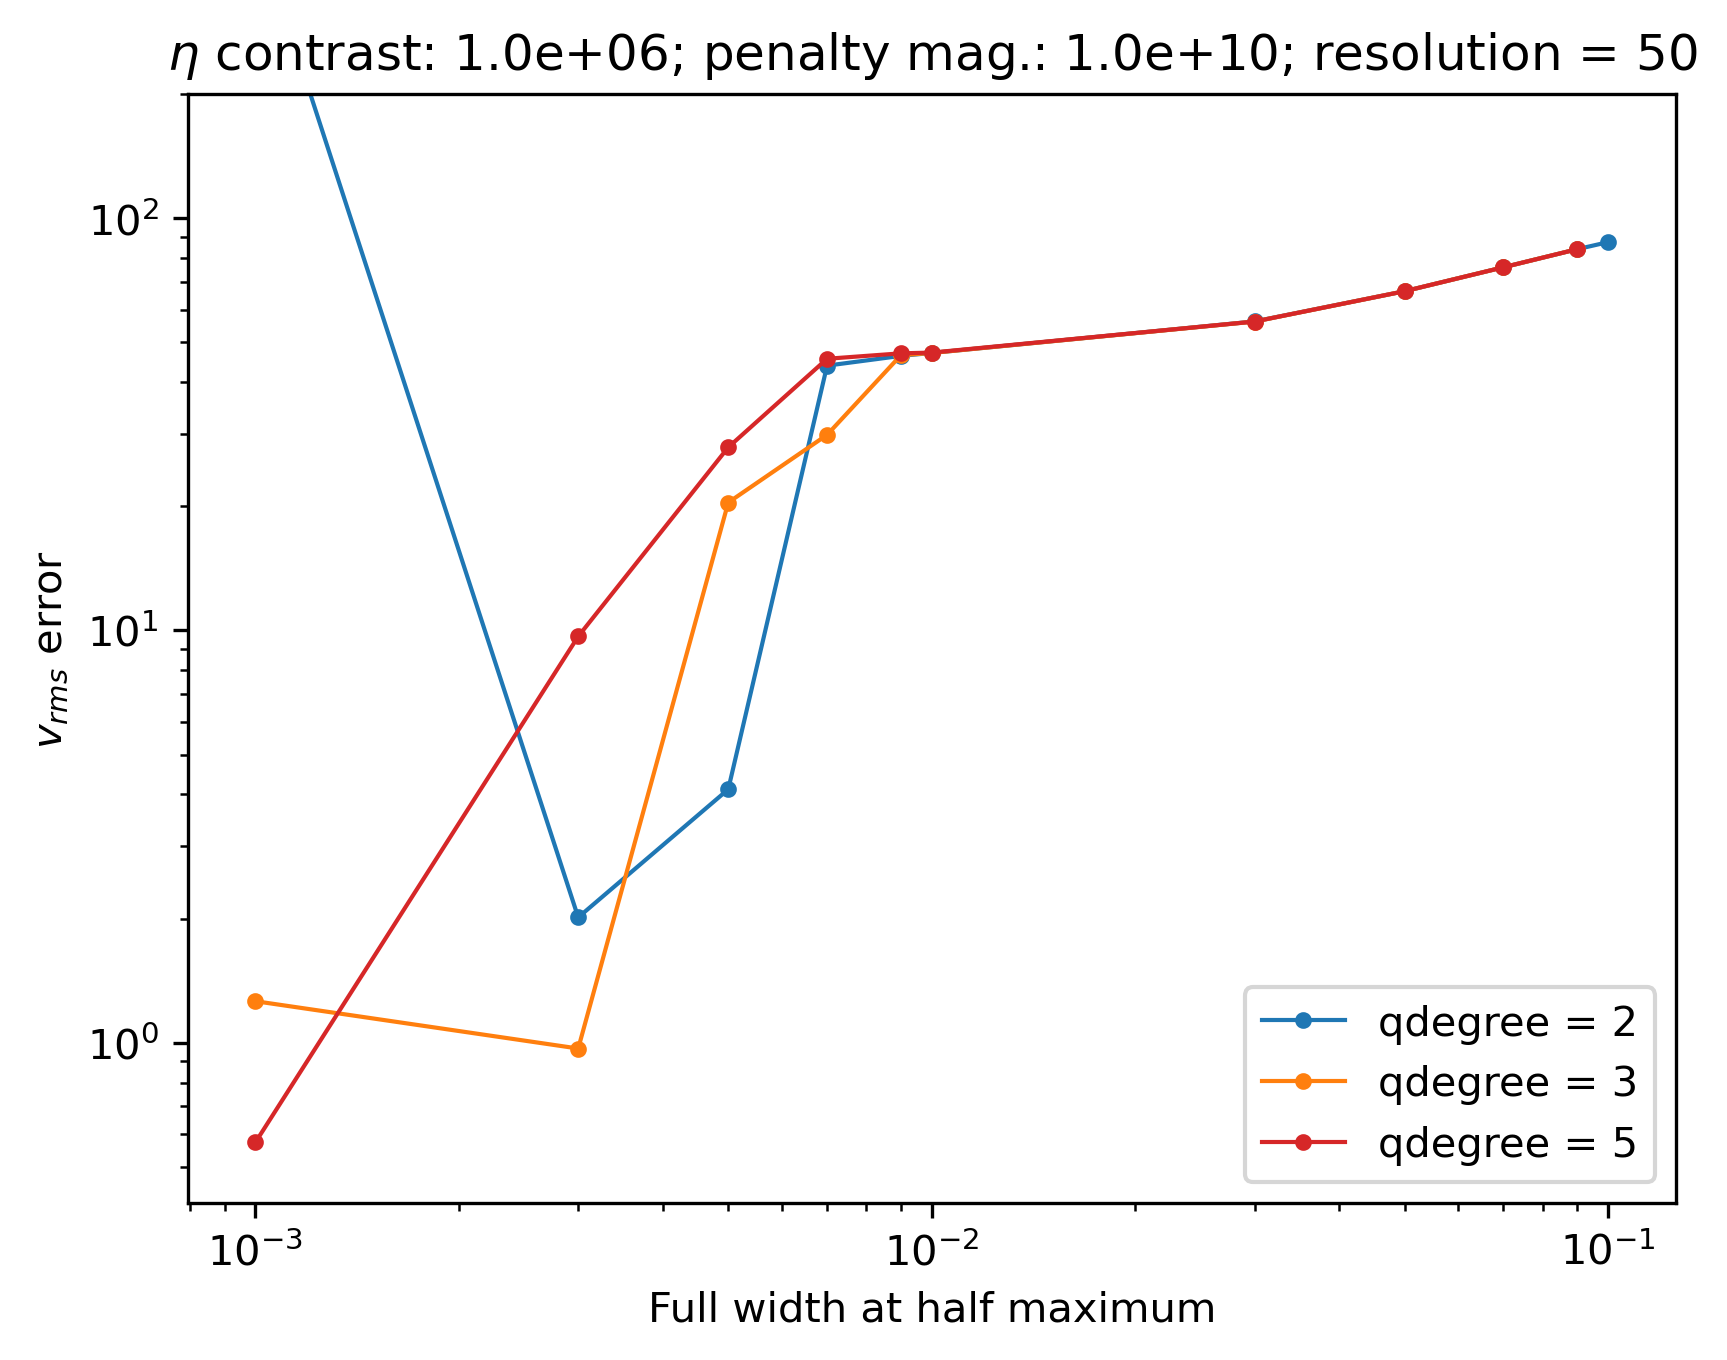

In [3]:
fig, ax = plt.subplots(dpi = 300)

for i, qdeg in enumerate(qdeg_list):
    fname = outdir + f"/qdeg{qdeg}_res{res}_ptf{ptf_str}.pkl"
    print(fname)
    try:
        with open(fname, "rb") as f:
            data = pickle.load(f)
        
        data = data[0]
        if len(data.shape) == 2:
            data = data[:, 0]

        print(data.shape)
        fwhm_use = fwhm_list[0:len(data)]
        
        ax.plot(fwhm_use, abs(data), "-o", markersize = 3, lw = 1, label = f"qdegree = {qdeg}", color = f"C{i}")
    
    except:
        pass

ax.set_yscale("log")
ax.set_xscale("log")
ax.legend()
ax.set_ylabel(r"$v_{rms}$ error")
ax.set_xlabel("Full width at half maximum")
ax.set_title(title)

if res == 50:
    ax.set_ylim([0, 200]) 

plt.savefig(outdir + f"/contrast{visc_cont:.1e}_res{res}_ptf{ptf_str}.png", dpi = "figure")

In [4]:
10**-2

0.01

In [5]:
0.01*100

1.0